# Polynomial Regression Example

In [1]:
# import sys
# sys.path.append('../../pyLearnAlgorithms')
import pandas as pd
import numpy as np
import os
from pyLearnAlgorithms.graph_view import GraphView
from pyLearnAlgorithms.polynomial_regression import PolynomialRegression
from pyLearnAlgorithms.split_data import SplitData

In [2]:
dr = '../datasets'
fl = 'ComponentsAnalysis.txt'
txt_path = os.path.join(dr, fl)
data = pd.read_csv(txt_path, header = None)

In [3]:
split = SplitData(data)
data_train, data_test, data_val = split.split_train_test_val(0.2, 0.2)
print(data_train.size)
print(data_test.size)
print(data_val.size)

118
38
38


In [4]:
data_train = np.array(data_train)
data_test = np.array(data_test)
data_val = np.array(data_val)
X, y = np.atleast_2d(data_train[:, 0]).T, data_train[:, 1]
Xtest, ytest = np.atleast_2d(data_test[:, 0]).T, data_test[:, 1]
Xval, yval = np.atleast_2d(data_val[:, 0]).T, data_val[:, 1]

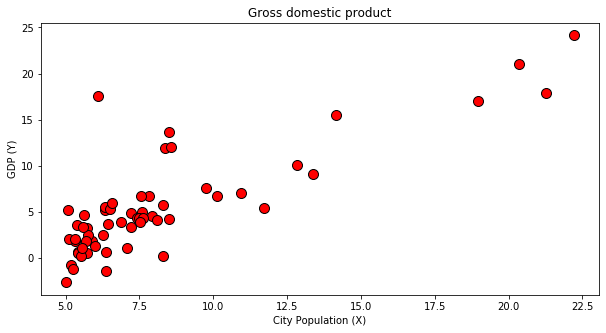

In [5]:
dataset_graph = GraphView(X, y)
dataset_graph.view_data(xlabel = 'City Population (X)', ylabel = 'GDP (Y)', 
                        title = 'Gross domestic product')

In [6]:
regressor = PolynomialRegression(X, y)
X_poly = regressor.poly_features(X, poly_degree = 3)
X_poly, mu, sigma = regressor.feature_normalize(X_poly)

In [7]:
Xtest = regressor.prepare_extracts(Xtest, ytest, mu, sigma, poly_degree = 3)
Xval = regressor.prepare_extracts(Xval, yval, mu, sigma, poly_degree = 3)

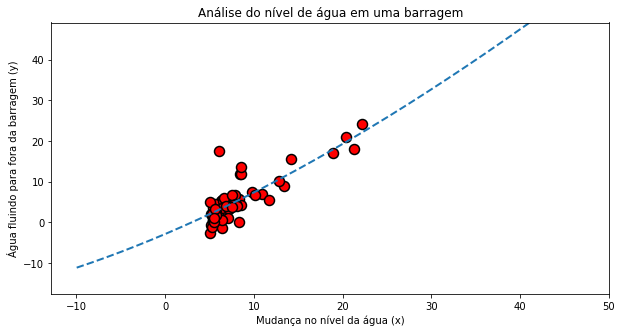

In [8]:
dataset_graph = GraphView(X, y)
dataset_graph.model_poly(xlabel = 'Mudança no nível da água (x)',
                         ylabel = 'Água fluindo para fora da barragem (y)', 
                         title = 'Análise do nível de água em uma barragem', 
                         Xpoly = X_poly, y = y, poly_degree = 3, mu = mu, sigma = sigma, 
                         lambda_ = 1, 
                         maxiter = 200)

In [9]:
train_error, val_error = regressor.learning_curve(X_poly, y, Xval, yval, lambda_ = 1)
print('# Training Examples\tTraining Error\t\tCross Validation Error')
for i in range(y.size):
    print('{}\t\t\t{}\t{}'.format(i+1, train_error[i], val_error[i]))

# Training Examples	Training Error		Cross Validation Error
1			3.5618061739791094e-16	22.16870219787884
2			0.004192775429821249	22.271438848967986
3			4.629765542485262	7.143003946745045
4			5.114397616385328	4.268088541821704
5			4.343089255268346	3.7285649406700414
6			3.6290018786710183	3.750483104203908
7			4.476121006719457	4.88753779971103
8			4.135814532289652	5.478249814055506
9			3.6762908848617	5.516152703349677
10			11.659796714622725	4.721199375475704
11			10.605039643454912	4.723758550457705
12			9.830086369705908	4.60802432964383
13			9.600964449092803	4.679766437255092
14			8.996554457698155	4.34237419544118
15			8.514057024590205	4.298428877947839
16			9.104634125967708	4.9104522613509145
17			8.581321452269185	4.880555574541266
18			8.141688631858885	4.838488732481409
19			8.216091873188633	5.307952829090081
20			8.072161350166871	4.512823454943064
21			7.68908093391165	4.501830997539756
22			7.561141656766676	4.535961145067318
23			8.026920323202457	4.564581296037546

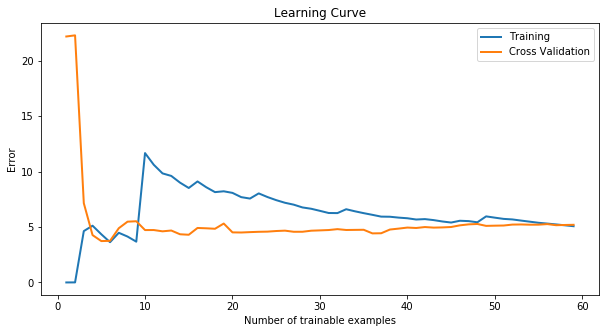

In [10]:
dataset_graph.learning_curve(train_error, val_error)

In [11]:
error_train, error_val = regressor.validation_curve(X_poly,y,Xval,yval,
                                                    lambda_vec = [0,0.001,0.003,0.01,0.03,0.1,0.3,1,3,10])
print('Training Examples\tTraining Error\t\tCross Validation Error')
for i in range(y.size):
    print('{}\t\t\t{}\t{}'.format(i+1, train_error[i], val_error[i]))

Training Examples	Training Error		Cross Validation Error
1			3.5618061739791094e-16	22.16870219787884
2			0.004192775429821249	22.271438848967986
3			4.629765542485262	7.143003946745045
4			5.114397616385328	4.268088541821704
5			4.343089255268346	3.7285649406700414
6			3.6290018786710183	3.750483104203908
7			4.476121006719457	4.88753779971103
8			4.135814532289652	5.478249814055506
9			3.6762908848617	5.516152703349677
10			11.659796714622725	4.721199375475704
11			10.605039643454912	4.723758550457705
12			9.830086369705908	4.60802432964383
13			9.600964449092803	4.679766437255092
14			8.996554457698155	4.34237419544118
15			8.514057024590205	4.298428877947839
16			9.104634125967708	4.9104522613509145
17			8.581321452269185	4.880555574541266
18			8.141688631858885	4.838488732481409
19			8.216091873188633	5.307952829090081
20			8.072161350166871	4.512823454943064
21			7.68908093391165	4.501830997539756
22			7.561141656766676	4.535961145067318
23			8.026920323202457	4.564581296037546
2

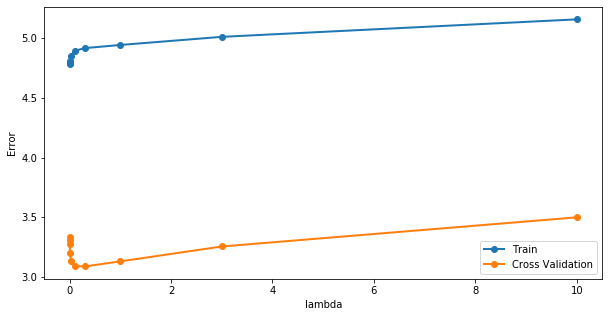

In [12]:
dataset_graph.validation_curve_poly(X_poly, y, Xtest, ytest,
                                    lambda_vec = [0,0.001,0.003,0.01,0.03,0.1,0.3,1,3,10])

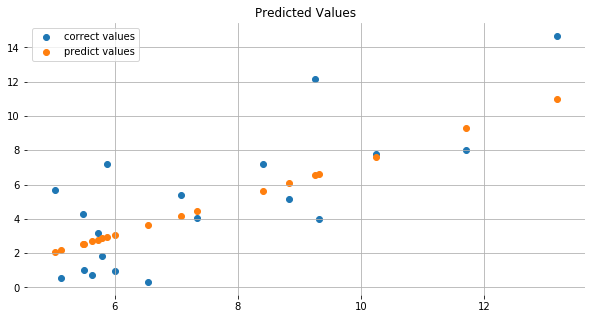

In [13]:
pred = regressor.predict(Xtest, X_poly, y, lambda_ = 1) 
dataset_graph.predicted_values(data_test[:, 0], ytest, pred)

In [14]:
optimize  =regressor.train_poly_reg(X_poly, y, 1 , 200)

In [15]:
optimize.x

array([ 5.46895271,  3.71684396,  0.98385753, -0.07682467])